# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

### From the plot, I observed....
Results: There is a positive correlation between `Attack` and `Defense`. The hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values. As Attack increases, Defense generally increases as well. Most Pokémon cluster in the mid-range values, while only a few have extremely high stats. The color gradient indicates that Pokémon with higher HP tend to appear more frequently among those with higher Attack and Defense values, suggesting stronger Pokémon often have balanced high stats.

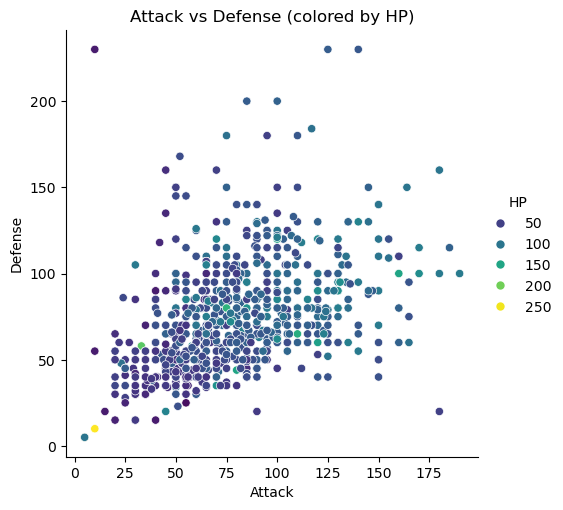

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the dataset
fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon = pd.read_csv(fp)

sns.relplot(
    data=pokemon,
    x='Attack',
    y='Defense',
    hue='HP',
    palette='viridis'
)

plt.title('Attack vs Defense (colored by HP)')
plt.show()

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

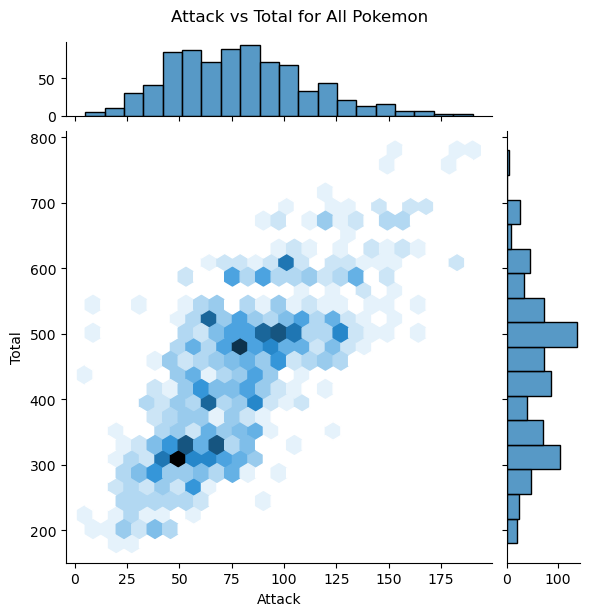

In [8]:
g = sns.jointplot(
    data=pokemon,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=25,  
    marginal_ticks=True
)

g.fig.suptitle("Attack vs Total for All Pokemon", y=1.02)  
plt.show()

From the plot, I observed  a strong positive relationship between Attack and Total stats. As Attack increases, the Total stat generally increases as well. The darker hexagons represent areas with a higher concentration of Pokémon, indicating that most Pokémon cluster around mid-range Attack (roughly 40–100) and Total values (around 300–550). The plot also shows that extremely high Total values are rare and typically correspond to higher Attack values. Additionally, the marginal histograms reveal that both Attack and Total distributions are skewed toward moderate values, with fewer Pokémon at the extreme high end.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

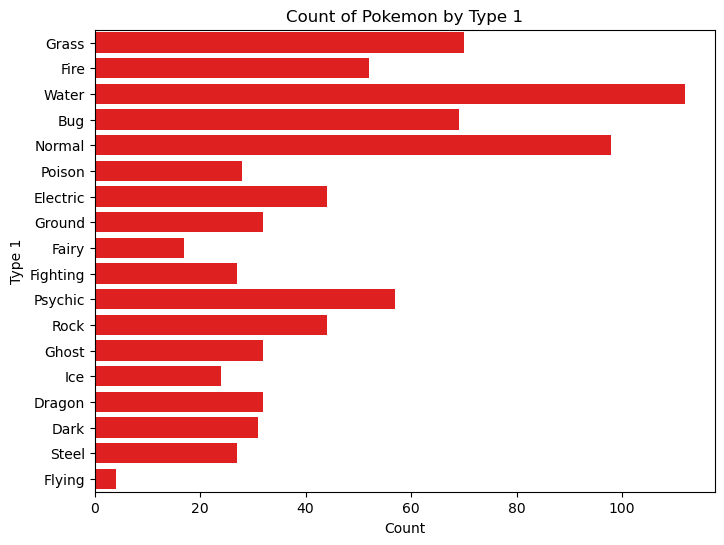

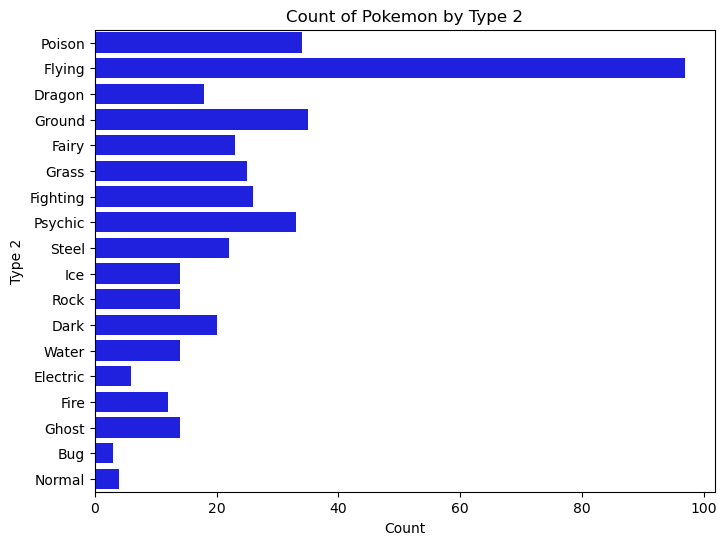

In [12]:
# Type 1
plt.figure(figsize=(8,6))
sns.countplot(
    data=pokemon,
    y='Type 1',
    color='red'
)

plt.title('Count of Pokemon by Type 1')
plt.xlabel('Count')
plt.ylabel('Type 1')
plt.show()

# Type 2
plt.figure(figsize=(8,6))
sns.countplot(
    data=pokemon,
    y='Type 2',
    color='blue'
)

plt.title('Count of Pokemon by Type 2')
plt.xlabel('Count')
plt.ylabel('Type 2')
plt.show()

From the Type 1 plot, the most common primary type is Water, followed by Normal and Grass. The least common Type 1 appears to be Flying, which has significantly fewer Pokémon compared to the others.
From the Type 2 plot, the most common secondary type is Flying, which stands out with the highest count. The rarest Type 2 types appear to be Bug and Normal, which have very small counts compared to other secondary types.
Overall, Water dominates as a primary type, while Flying is the most common secondary type in the dataset.

## Q4-6: Your own question
Come up with three more questions to further explore the pokemon dataset.

Your question(s):

- Q4: Do Legendary Pokémon have higher Total stats than non-Legendary Pokémon?
- Q5: How does Speed relate to Attack?
- Q6: Which Generation has the highest average Total stats?


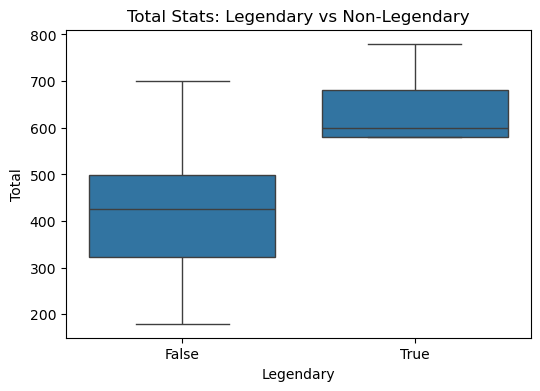

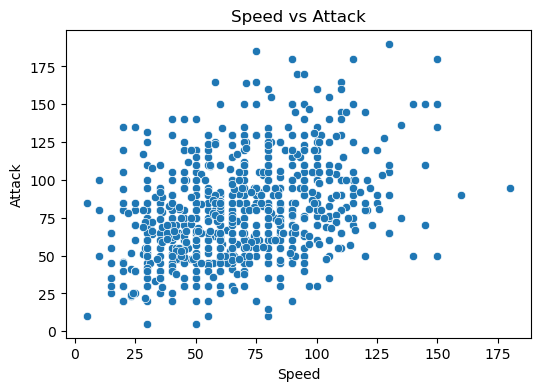

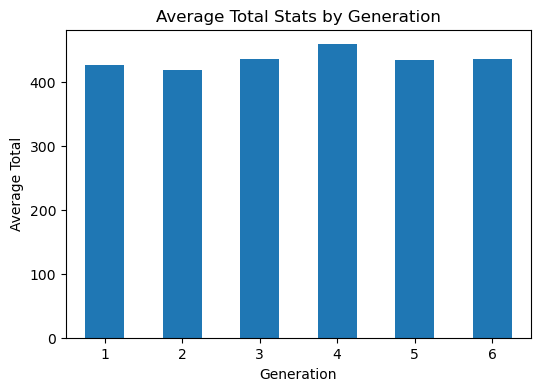

In [14]:
# Q4: Legendary vs Non-Legendary Total stats
plt.figure(figsize=(6,4))
sns.boxplot(data=pokemon, x='Legendary', y='Total')
plt.title('Total Stats: Legendary vs Non-Legendary')
plt.show()


# Q5: Speed vs Attack
plt.figure(figsize=(6,4))
sns.scatterplot(data=pokemon, x='Speed', y='Attack')
plt.title('Speed vs Attack')
plt.show()


# Q6: Average Total by Generation
plt.figure(figsize=(6,4))
pokemon.groupby('Generation')['Total'].mean().plot(kind='bar')

plt.title('Average Total Stats by Generation')
plt.ylabel('Average Total')
plt.xticks(rotation=0) 
plt.show()